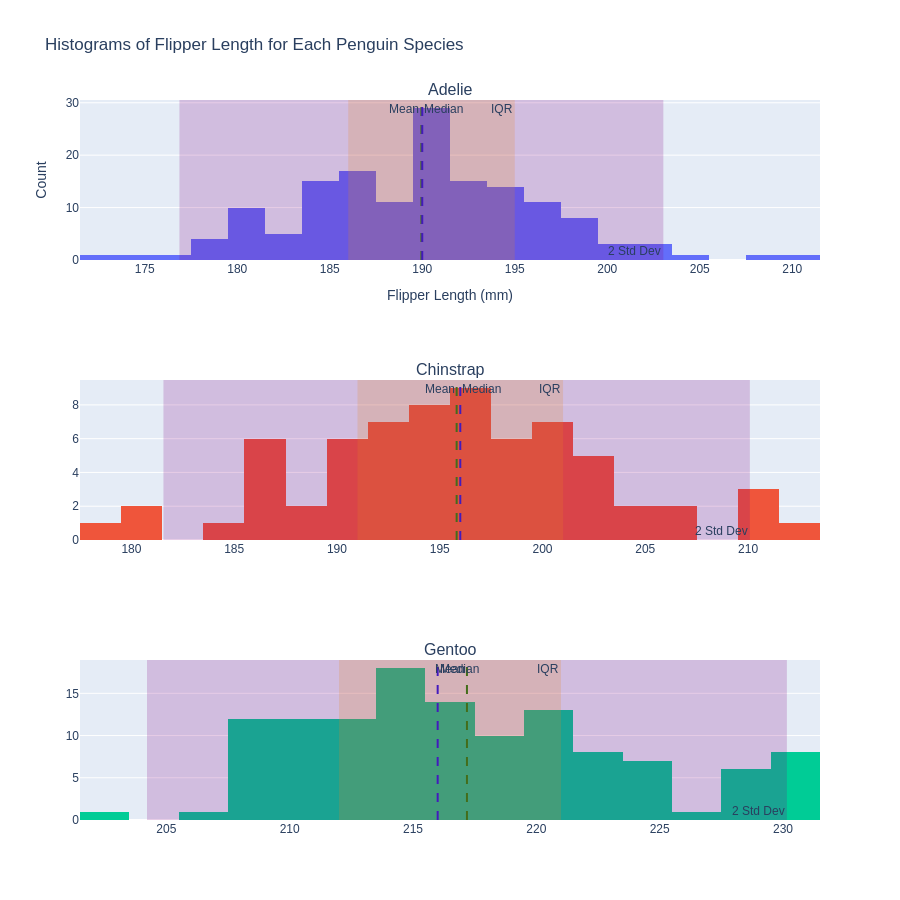

In [37]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a function to add annotations
def add_annotations(fig, species_data, species_name, row, col):
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    std_flipper = species_data['flipper_length_mm'].std()
    q1_flipper = species_data['flipper_length_mm'].quantile(0.25)
    q3_flipper = species_data['flipper_length_mm'].quantile(0.75)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line=dict(color='green', dash='dash'), row=row, col=col,
                  annotation_text="Mean", annotation_position="top left")
    fig.add_vline(x=median_flipper, line=dict(color='blue', dash='dash'), row=row, col=col,
                  annotation_text="Median", annotation_position="top right")

    # Add shaded area for interquartile range (IQR)
    fig.add_vrect(x0=q1_flipper, x1=q3_flipper, fillcolor="orange", opacity=0.2, line_width=0, row=row, col=col,
                  annotation_text="IQR", annotation_position="top right")

    # Add shaded area for 2 standard deviations range
    fig.add_vrect(x0=mean_flipper - 2 * std_flipper, x1=mean_flipper + 2 * std_flipper,
                  fillcolor="purple", opacity=0.2, line_width=0, row=row, col=col,
                  annotation_text="2 Std Dev", annotation_position="bottom right")

# Create subplots for each species
species_list = penguins['species'].unique()
fig = make_subplots(rows=len(species_list), cols=1, subplot_titles=species_list)

# Loop through each species and add histograms and annotations
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]

    # Add histogram for flipper length
    fig.add_trace(
        go.Histogram(x=species_data['flipper_length_mm'], nbinsx=20, name=f'{species}'),
        row=i + 1, col=1
    )

    # Add annotations (mean, median, IQR, and std dev range)
    add_annotations(fig, species_data, species, row=i + 1, col=1)

# Update layout for better readability
fig.update_layout(
    height=900, width=900, title_text="Histograms of Flipper Length for Each Penguin Species",
    showlegend=False, xaxis_title="Flipper Length (mm)", yaxis_title="Count"
)

# Show the figure
fig.show(renderer="png")


Question 2.

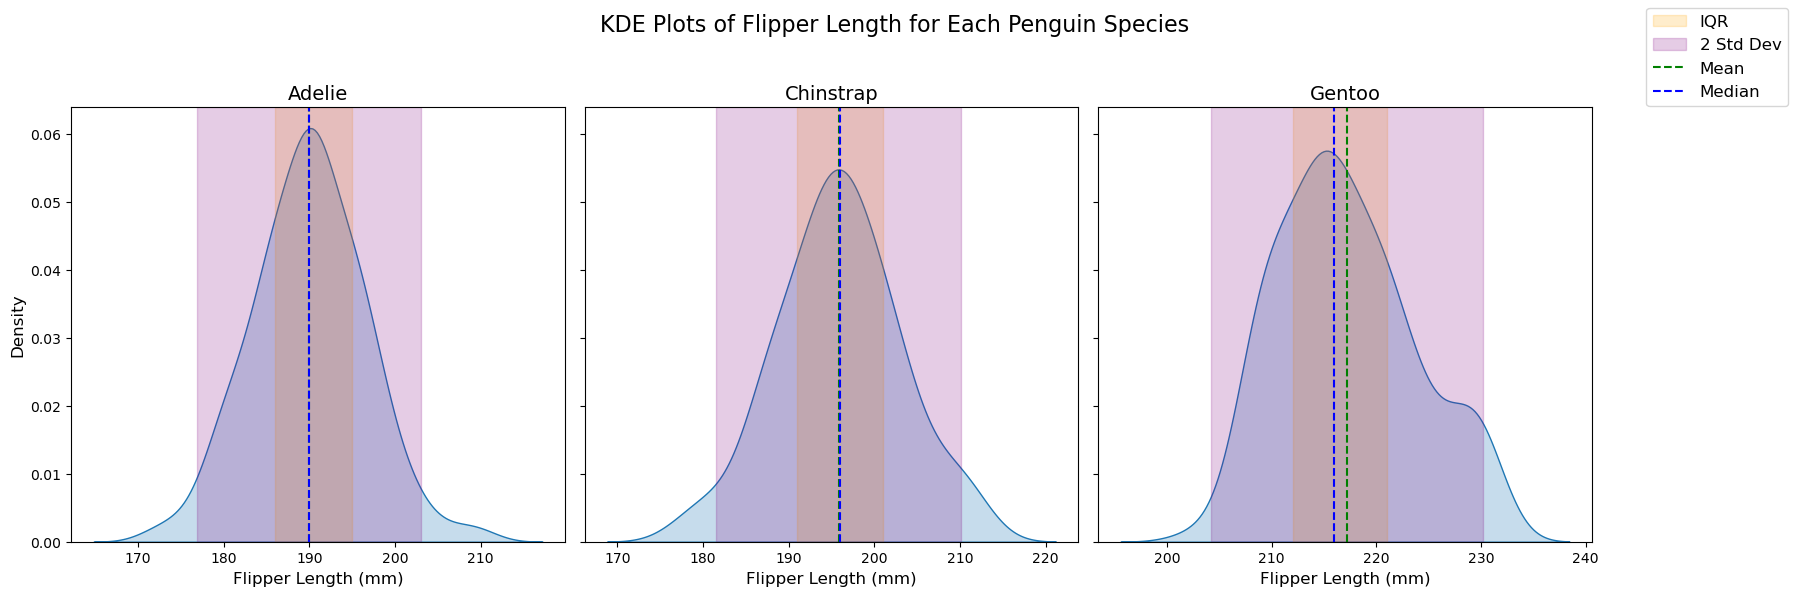

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create a figure with 3 subplots (one for each species)
species_list = penguins['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('KDE Plots of Flipper Length for Each Penguin Species', fontsize=16)

# Colors for shaded regions
colors = {
    'mean': 'green',
    'median': 'blue',
    'iqr': 'orange',
    'std_dev': 'purple'
}

# Function to add annotations to each plot
def add_annotations(ax, species_data):
    mean_flipper = species_data['flipper_length_mm'].mean()
    median_flipper = species_data['flipper_length_mm'].median()
    std_flipper = species_data['flipper_length_mm'].std()
    q1_flipper = species_data['flipper_length_mm'].quantile(0.25)
    q3_flipper = species_data['flipper_length_mm'].quantile(0.75)
    
    # Shaded area for interquartile range (IQR)
    ax.axvspan(q1_flipper, q3_flipper, color=colors['iqr'], alpha=0.2, label='IQR')

    # Shaded area for 2 standard deviations range
    ax.axvspan(mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper,
               color=colors['std_dev'], alpha=0.2, label='2 Std Dev')

    # Vertical lines for mean and median
    ax.axvline(mean_flipper, color=colors['mean'], linestyle='--', label='Mean')
    ax.axvline(median_flipper, color=colors['median'], linestyle='--', label='Median')

# Loop through each species and create KDE plots
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]

    # KDE plot for flipper length
    sns.kdeplot(species_data['flipper_length_mm'], ax=axes[i], fill=True)

    # Add annotations (mean, median, IQR, and std dev range)
    add_annotations(axes[i], species_data)

    # Set titles and labels
    axes[i].set_title(f'{species}', fontsize=14)
    axes[i].set_xlabel('Flipper Length (mm)', fontsize=12)

# Add common y-label
axes[0].set_ylabel('Density', fontsize=12)

# Add legend to the first plot
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


Question 3.

Certainly! Here’s a summary of our discussion:

---

### Summary of Data Visualization Techniques

We explored three common methods for visualizing data distributions: **box plots**, **histograms**, and **kernel density estimators (KDEs)**, focusing on their differences, advantages, and disadvantages.

1. **Box Plots**:
   - **Summary**: Box plots summarize data by displaying the median, quartiles, and potential outliers.
   - **Pros**: They provide a compact summary and are effective for comparing distributions across groups. They explicitly identify outliers.
   - **Cons**: They do not show frequency or density and can obscure nuances in the distribution.

2. **Histograms**:
   - **Summary**: Histograms display the frequency distribution of data by dividing it into bins.
   - **Pros**: They offer a clear view of data distribution and are intuitive for interpretation. Histograms show actual frequency counts.
   - **Cons**: The appearance of histograms can vary based on the choice of bin size, and they do not provide precise information about individual data points.

3. **Kernel Density Estimators (KDEs)**:
   - **Summary**: KDEs provide a smoothed estimate of the data distribution, representing density rather than frequency.
   - **Pros**: They reveal patterns in the data, such as multimodal distributions, and are not dependent on bin widths.
   - **Cons**: The smoothing can misrepresent the actual distribution if bandwidth is not chosen carefully, and they can be less intuitive for interpretation.

### Personal Preference
You expressed a preference for histograms, noting that they offer a direct and intuitive sense of data distribution. You find them easier to interpret at a glance for quick insights compared to KDEs.

---

Let me know if you need any adjustments or additional details!

https://chatgpt.com/share/66ef10d2-9664-800b-9cbf-011e7dddd725

Question 4.

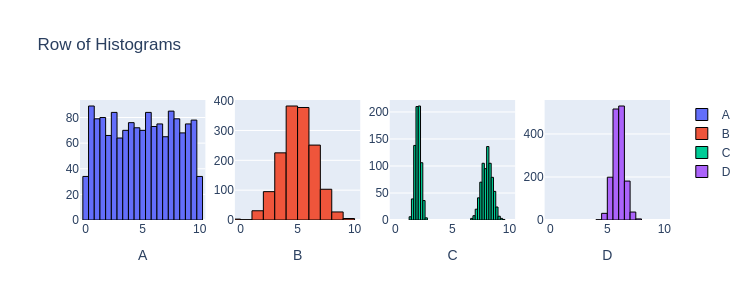

In [41]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig3 = make_subplots(rows=1, cols=4)

fig3.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig3.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig3.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig3.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig3.update_layout(height=300, width=750, title_text="Row of Histograms")
fig3.update_xaxes(title_text="A", row=1, col=1)
fig3.update_xaxes(title_text="B", row=1, col=2)
fig3.update_xaxes(title_text="C", row=1, col=3)
fig3.update_xaxes(title_text="D", row=1, col=4)
fig3.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig3.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Datasets A and C have similar means and similar variances.

Datasets B and C have similar means but quite different variances.

Datasets B and D have similar variances but quite different means.

Datasets A and D have quite different means and quite different variances.

Question 5.

In [4]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

1) Right Skewness- In a right skewed distribution, the tail extends more to the right. This results in the mean being greater than the median because larger values on the right side pull the mean upward, while the median, which is the middle value, remains stable.
2) Left Skewness- In a left skewed distribution, the tail extends more to the left. The mean is typically less than the median because lower values on the left side pull the mean downward, while the median stays closer to the center.
3) Symmetric Distribution- In symmetric distributions, the mean and median are equal because the data is evenly distributed around the center.
All of these happens because 'Mean' is sensitive to large values, as it is calculated by summing all data points and dividing by the number of points. 'Median' is more robust against outliers, as it is determined byt he middle value of the data(ordered).

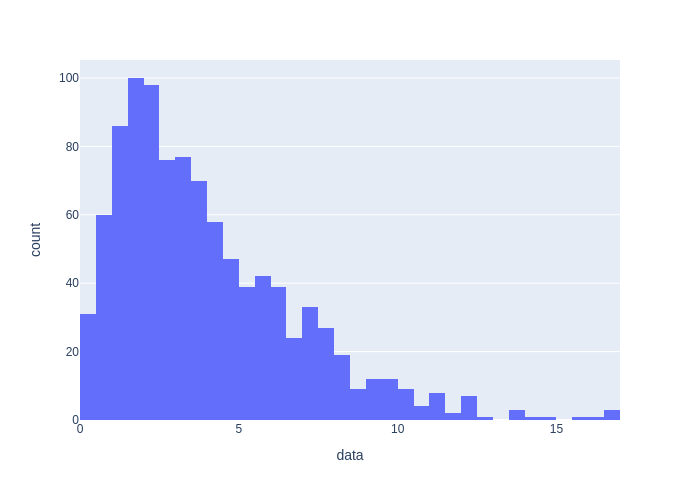

Right-Skewed Data: Mean = 4.007216318521427, Median = 3.3620367136928992


In [5]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)

fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
fig1.show(renderer="png")

mean1 = sample1.mean()
median1 = np.quantile(sample1, 0.5)

print(f"Right-Skewed Data: Mean = {mean1}, Median = {median1}")


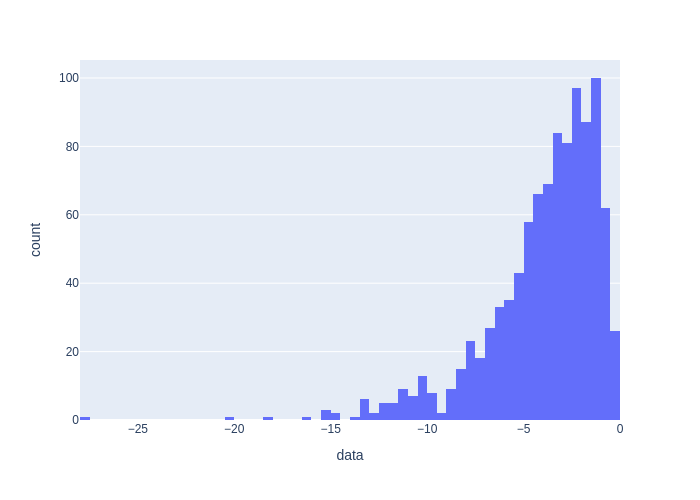

Left-Skewed Data: Mean = -3.989285489029302, Median = -3.28812821845644


In [6]:
sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)

fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer="png")

mean2 = sample2.mean()
median2 = np.quantile(sample2, 0.5)

print(f"Left-Skewed Data: Mean = {mean2}, Median = {median2}")


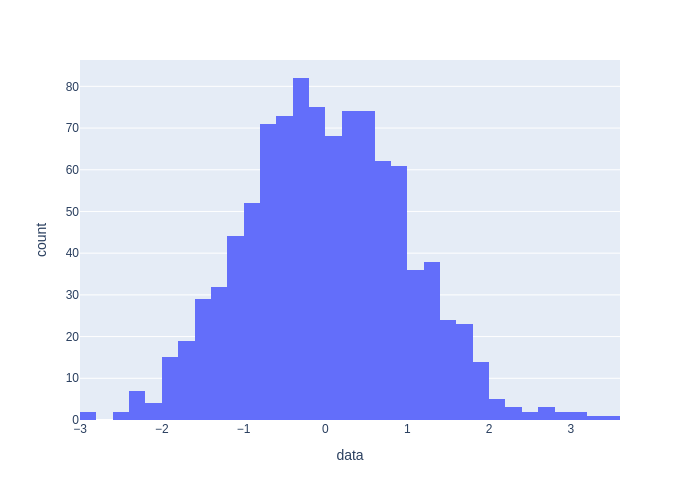

Symmetric Data: Mean = 0.010219039730663508, Median = -0.007099767361449778


In [7]:
sample3 = np.random.normal(loc=0, scale=1, size=1000)

fig3 = px.histogram(pd.DataFrame({'data': sample3}), x="data")
fig3.show(renderer="png")

mean3 = sample3.mean()
median3 = np.quantile(sample3, 0.5)

print(f"Symmetric Data: Mean = {mean3}, Median = {median3}")


Here's a summary of our discussion:

---

### Summary of Discussion on Mean, Median, and Skewness

1. **Relationship Between Mean and Median**:
   - **Right Skew (Positive Skew)**: In a right-skewed distribution, the mean is typically greater than the median due to extreme values on the right pulling the mean upward.
   - **Left Skew (Negative Skew)**: In a left-skewed distribution, the mean is usually less than the median, as extreme values on the left pull the mean downward.
   - **Symmetric Distributions**: In symmetric distributions, such as the normal distribution, the mean and median are equal.

2. **Code Explanation**:
   - The code uses the `scipy` library to generate random samples from a gamma distribution, which is right-skewed.
   - A histogram is created using `plotly.express` to visualize the distribution of the first sample.
   - The mean and median of the sample are calculated to illustrate their values.
   - A second sample is generated by negating the first sample, creating a left-skewed distribution.

3. **Demonstrating Skewness**:
   - The analysis compares the mean and median of both samples to highlight how skewness affects these measures of central tendency.
   - In the right-skewed sample, the mean will be higher than the median, while in the left-skewed sample, the mean will be lower than the median.

---

Feel free to modify it if you need to add any personal insights or additional details!

https://chatgpt.com/share/66ef1d3f-adc8-800b-bde8-53b9bdfb9bee

Question 6.

In [8]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

In [9]:
print(df.head())

   restaurant id  category id  item id  serving size (oz)  calories  \
0           1000          100        0                4.8       300   
1           1000          100        1                4.8       250   
2           1000          100        2                3.9       370   
3           1000          100        3                5.7       450   
4           1000          100        4                5.7       400   

   calories from fat total fat (g)  total fat (% daily value)  \
0              120.0          13.0                       20.0   
1               70.0           8.0                       12.0   
2              200.0          23.0                       35.0   
3              250.0          28.0                       43.0   
4              210.0          23.0                       35.0   

   saturated fat (g)  saturated fat (% daily value)  ...  carbohydrates (g)  \
0                5.0                           25.0  ...                 31   
1                3.0    

In [10]:
print(df.columns)

Index(['restaurant id', 'category id', 'item id', 'serving size (oz)',
       'calories', 'calories from fat', 'total fat (g)',
       'total fat (% daily value)', 'saturated fat (g)',
       'saturated fat (% daily value)', 'trans fat (g)', 'cholesterol (mg)',
       'cholesterol (% daily value)', 'sodium (mg)', 'sodium (% daily value)',
       'carbohydrates (g)', 'carbohydrates (% daily value)',
       'dietary fiber (g)', 'dietary fiber (% daily value)', 'sugars (g)',
       'protein (g)', 'vitamin a (% daily value)', 'vitamin c (% daily value)',
       'calcium (% daily value)', 'iron (% daily value)'],
      dtype='object')


In [11]:
print(df.describe())

       restaurant id  category id    item id  serving size (oz)     calories  \
count     750.000000   750.000000  750.00000         395.000000   750.000000   
mean     2126.666667   113.685333  374.50000          10.612996   296.149333   
std       897.234043     9.956229  216.65064           7.286159   209.034366   
min      1000.000000   100.000000    0.00000           0.035274     0.000000   
25%      1000.000000   106.000000  187.25000           5.200000   150.000000   
50%      2000.000000   111.000000  374.50000          10.158912   260.000000   
75%      3000.000000   123.000000  561.75000          16.000000   410.000000   
max      3000.000000   130.000000  749.00000          32.000000  1880.000000   

       calories from fat  total fat (% daily value)  saturated fat (g)  \
count         260.000000                 260.000000         637.000000   
mean          127.096154                  21.815385           3.409105   
std           127.875914                  21.885199      

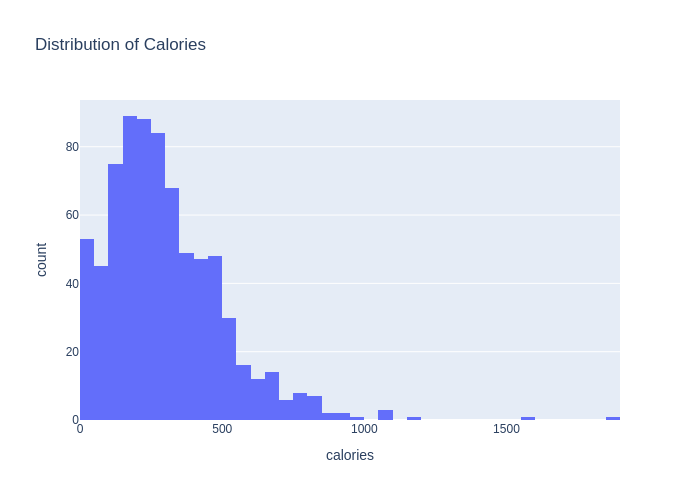

In [12]:
import plotly.express as px

fig_calories = px.histogram(df, x='calories', title='Distribution of Calories')
fig_calories.show(renderer="png")

The calorie counts ranges from 0 to approximately 2000. Most items fall between 0 and 500 calories, peaking at around 200-400 calories. This indicates that the majority of items in the dataset have a relatiely low-calorie count. The distribution is right-skewed, suggesting the presence of some high-calorie outliers while the bulk of the data is concentrated on the lower end.

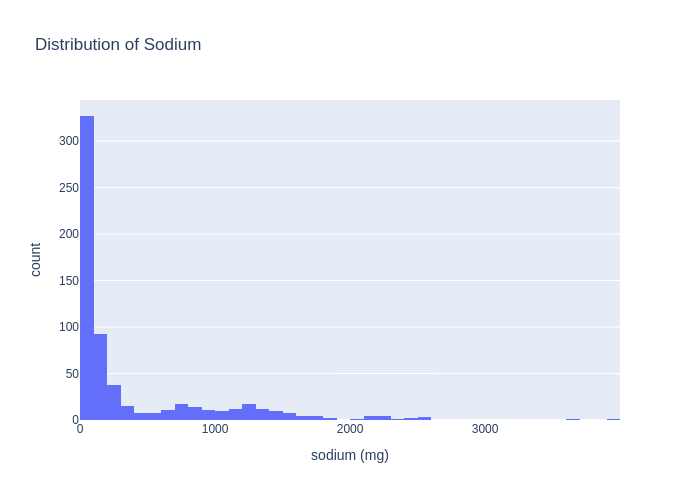

In [18]:
fig_sodium = px.histogram(df, x='sodium (mg)', title='Distribution of Sodium')
fig_sodium.show(renderer="png")

Sodium content ranges from 0 to approximately 4000mg. A sharp peak occurs in the low sodium range (0-500 mg), indicating that most items contain low sodium, with very few exceeding 1000mg. The distribution is also right-skewed, similar to the calorie distribution, with a long tail on the higher sodium side.

Question 7.

In [33]:
import pandas as pd
import plotly.express as px

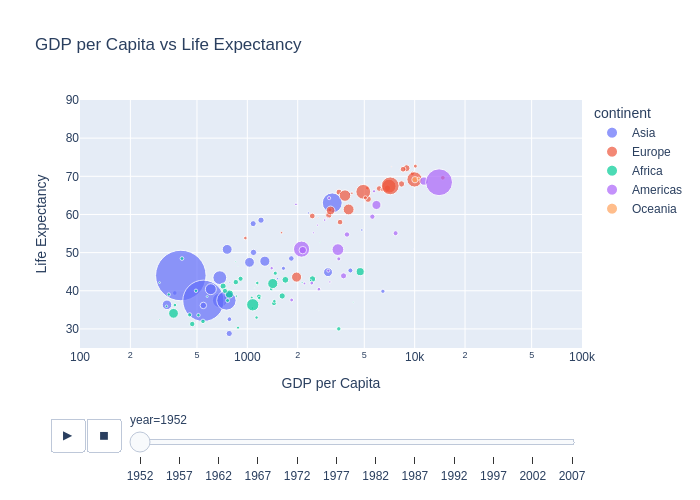

In [35]:
df = px.data.gapminder()
fig_life_expect=px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90], title="GDP per Capita vs Life Expectancy", labels={"gdpPercap":"GDP per Capita", "lifeExp":"Life Expectancy"})
fig_life_expect.show(renderer="png")


Question 8.

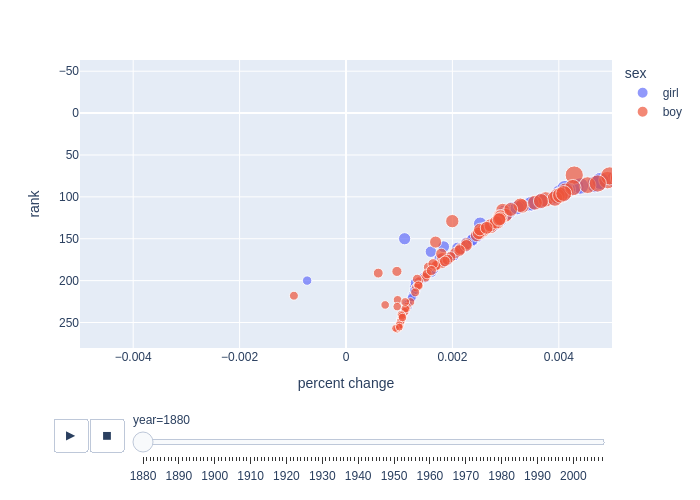

In [44]:
import pandas as pd
import plotly.express as px
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig8 = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig8.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig8.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 9. Yes